# Recursive State Estimation - Exersices
Gerald Baulig 0780827

## Exercise 2

Suppose we live at a place where days are either sunny, cloudy, or rainy. The weather transition function is a Markov chain with the following transition table:

|       |        |       |          |       |
|-------|--------|-------|----------|-------|
|       |        |       | tomorrow |       |
|       |        | sunny |  cloudy  | rainy |
|       |  sunny |  0.8  |    0.2   |  0.0  |
| today | cloudy |  0.4  |    0.4   |  0.2  |
|       |  rainy |  0.2  |    0.6   |  0.2  |

### Exercise 2.a)
Suppose Day 1 is a sunny day. What is the probability of the following sequence of days: Day2 = $cloudy$, Day3 = $cloudy$, Day4 = $rainy$?

---

Each day in a sequence creates a subset of its propbability of occurrence:

Sequence $x = [sunny, cloudy, cloudy, rainy]$ \
define: $(sunny=1, cloudy=2, rainy=3)$

$$
P(X_1=1 \cap X_2=2 \cap X_3=2 \cap X_4=3) \\
= P(X_1=1) \times P(X_2=2|X_1=1) \times P(X_3=2|X_2=2) \times P(X_4=3|X_3=2)
$$

Day 1 is sunny as a fact: $P(X_1=1) = 1.0$ \
Transition day 1,2: $P(X_2=2|X_1=1) = 0.2$ \
Transition day 2,3: $P(X_3=2|X_2=2) = 0.4$ \
Transition day 3,4: $P(X_4=3|X_3=2) = 0.2$

Hence:

$$
1.0 \times 0.2 \times 0.4 \times 0.2 = 0.016
$$

The probability that sequence $x$ occures is $0.016$

### Exercise 2.b)

Write a simulator that can randomly generate sequences of “weathers” from this state transition function.

---

In [20]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

np.random.seed(5)
weather = ('sunny', 'cloudy', 'rainy')
lookup = {k:v for v, k in enumerate(weather)}
transition = np.array((.8, .2, 0, .4, .4, .2, .2, .6, .2)).reshape(3,3)

#transform props to decision-borders
D = transition.copy()
for i in range(1,D.shape[0]):
    D[:,i] += D[:,i-1]

data = zip(('sunny', 'cloudy', 'rainy'), *D.T)
print("Decition borders:")
print(tabulate(data, ('   tomorrow\ntoday', 'sunny', 'cloudy', 'rainy'), tablefmt='orgtbl'))

#Generator:
def sim_weather(first_day, days_to_gen):
    event = np.random.rand(days_to_gen)
    today = lookup[first_day]
    sequence = [None for i in range(days_to_gen)]
    probability = 1.0

    for i, e in enumerate(event):
        tomorrow = np.argmax(e <= D[today]) #find first true
        sequence[i] = weather[tomorrow]
        probability *= transition[today,tomorrow]
        today = tomorrow
    return sequence, probability, event

#Result
sequence, probability, event = sim_weather('sunny', 10)
print("\nEvents:\n", event)
print("\nGenerated sequence:\n", sequence)
print("Probability:", probability)

Decition borders:
|    tomorrow   |   sunny |   cloudy |   rainy |
| today         |         |          |         |
|---------------+---------+----------+---------|
| sunny         |     0.8 |      1   |       1 |
| cloudy        |     0.4 |      0.8 |       1 |
| rainy         |     0.2 |      0.8 |       1 |

Events:
 [0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]

Generated sequence:
 ['sunny', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'sunny']
Probability: 0.00010485760000000006


### Exercise 2.c)

Use your simulator to determine the stationary distribution of this Markov chain. The stationary distribution measures the probability that a random day will be sunny, cloudy, or rainy.

Stationary distribution:
|   sunny |   cloudy |   rainy |
|---------+----------+---------|
|   0.645 |   0.2813 |  0.0737 |


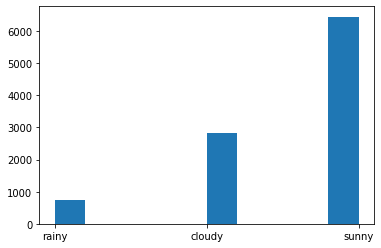

In [30]:
np.random.seed(4)
sequence, probability, event = sim_weather('rainy', 10000)
sequence = np.array(sequence)

data = [((sequence == 'sunny').mean(),
         (sequence == 'cloudy').mean(),
         (sequence == 'rainy').mean())]
print("Stationary distribution:")
print(tabulate(data,('sunny', 'cloudy', 'rainy'), tablefmt='orgtbl'))
plt.hist(sequence)
plt.show()

### Exercise 2.d)
Can you devise a closed-form solution to calculating the stationary distribution based on the state transition matrix above?

---

**Definition:** "The stationery distribution of a Markov Chain with transition matrix $P$ is some vector, $\psi$, such that $\psi P = \psi$." (1)

Hense:

$$
\begin{bmatrix}
\psi_1 & \psi_2 & \psi_3 \\
\end{bmatrix}
\times
\begin{bmatrix}
0.8 & 0.2 & 0.0 \\
0.4 & 0.4 & 0.2 \\
0.2 & 0.6 & 0.2
\end{bmatrix}
=
\begin{bmatrix}
\psi_1 & \psi_2 & \psi_3 \\
\end{bmatrix}
$$

$$
.8\psi_1 - \psi_1 + .4\psi_2 + .2\psi_3 = 0 \\
.2\psi_1 + .4\psi_2 - \psi_2 + .6\psi_3 = 0 \\
\psi_1 + \psi_2 + \psi_3 = 1
$$

Powered by: https://www.mathportal.org/calculators/system-of-equations-solver/system-3x3.php

$$ \begin{array}{ cccc }\color{red}{ -\frac{ 1 }{ 5 } }~ x&\color{blue}{ +~~\frac{ 2 }{ 5 } }~ y&\color{green}{ +~~\frac{ 1 }{ 5 } }~ z&~=~0\\\color{red}{ \frac{ 1 }{ 5 } }~ x&\color{blue}{ -~~~\frac{ 3 }{ 5 } }~ y&\color{green}{ +~~\frac{ 3 }{ 5 } }~ z&~=~0\\\color{red}{ ~ }~ x&\color{blue}{ +~~~ }~ y&\color{green}{ +~~~ }~ z&~=~1\end{array} $$<p class="uvucen" style="padding:0;"><b>The solutions are:</b></p>$$ x = \frac{ 9 }{ 14 } ~,~y = \frac{ 2 }{ 7 } ~,~z = \frac{ 1 }{ 14 } $$<p><b>Explanation:</b></p><p class="uvucen"><b>Step 1:</b> Find the determinant of the <b>coefficient matrix</b>.</p>$$ D= \left| \begin{array}{ ccc }\color{red}{ -\frac{ 1 }{ 5 } }&\color{blue}{ ~~\frac{ 2 }{ 5 } }&\color{green}{ ~~\frac{ 1 }{ 5 } }\\\color{red}{ \frac{ 1 }{ 5 } }&\color{blue}{ -\frac{ 3 }{ 5 } }&\color{green}{ ~~\frac{ 3 }{ 5 } }\\\color{red}{ 1 }&\color{blue}{ ~~1 }&\color{green}{ ~~1 }\end{array} \right| = \frac{ 14 }{ 25 } $$<p class="uvucen"><b>Step 2:</b> Find the determinant of the <b>x - matrix ( D<sub>x</sub> )</b>. X - matrix is formed by replacing the x-column values with the answer-column values.</p>$$ D_x= \left| \begin{array}{ ccc }\color{black}{ 0 }&\color{blue}{ ~~\frac{ 2 }{ 5 } }&\color{green}{ ~~\frac{ 1 }{ 5 } }\\\color{black}{ 0 }&\color{blue}{ -\frac{ 3 }{ 5 } }&\color{green}{ ~~\frac{ 3 }{ 5 } }\\\color{black}{ 1 }&\color{blue}{ ~~1 }&\color{green}{ ~~1 }\end{array} \right| = \frac{ 9 }{ 25 } $$<p class="uvucen"><b>Step 3:</b> Find the determinant of the <b>y - matrix</b>. </p>$$ D_y= \left| \begin{array}{ ccc }\color{red}{ -\frac{ 1 }{ 5 } }&\color{black}{ ~~0 }&\color{green}{ ~~\frac{ 1 }{ 5 } }\\\color{red}{ \frac{ 1 }{ 5 } }&\color{black}{ ~~0 }&\color{green}{ ~~\frac{ 3 }{ 5 } }\\\color{red}{ 1 }&\color{black}{ ~~1 }&\color{green}{ ~~1 }\end{array} \right| = \frac{ 4 }{ 25 } $$<p class="uvucen"><b>Step 4:</b> Find the determinant of the <b>z - matrix</b>. </p>$$ D_z= \left| \begin{array}{ ccc }\color{red}{ -\frac{ 1 }{ 5 } }&\color{blue}{ ~~\frac{ 2 }{ 5 } }&\color{black}{ ~~0 }\\\color{red}{ \frac{ 1 }{ 5 } }&\color{blue}{ -\frac{ 3 }{ 5 } }&\color{black}{ ~~0 }\\\color{red}{ 1 }&\color{blue}{ ~~1 }&\color{black}{ ~~1 }\end{array} \right| = \frac{ 1 }{ 25 } $$<p class="uvucen" style="padding:0;"><b>Cramers Rule says that the solutions are </b></p>$$ x = \frac{D_x}{D} ~,~y = \frac{D_y}{D}~,~z = \frac{D_z}{D} $$<p class="uvucen" style="padding:0;"><b>So, in this example we have:</b></p>$$ \begin{aligned}  x &= \frac{D_x}{D} = \frac{ \frac{ 9 }{ 25 } }{ \frac{ 14 }{ 25 } } = \frac{ 9 }{ 14 } \\ y &= \frac{D_y}{D} = \frac{ \frac{ 4 }{ 25 } }{ \frac{ 14 }{ 25 } } = \frac{ 2 }{ 7 } \\z &= \frac{D_z}{D} = \frac{ \frac{ 1 }{ 25 } }{ \frac{ 14 }{ 25 } } = \frac{ 1 }{ 14 } \end{aligned} $$

**References:**
1. https://www.stat.berkeley.edu/~mgoldman/Section0220.pdf
2. https://stackoverflow.com/questions/31791728/python-code-explanation-for-stationary-distribution-of-a-markov-chain

#### Via Numpy Solve

In [27]:
EQ = transition.copy().T
EQ[(0,1),(0,1)] -= 1
EQ[-1,:] = 1
p = np.linalg.solve(EQ, [0,0,1])

print("EQ:\n", EQ)
print("\nStationary distribution:")
print(tabulate(p[None,:],('sunny', 'cloudy', 'rainy'), tablefmt='orgtbl'))

EQ:
 [[-0.2  0.4  0.2]
 [ 0.2 -0.6  0.6]
 [ 1.   1.   1. ]]

Stationary distribution:
|    sunny |   cloudy |     rainy |
|----------+----------+-----------|
| 0.642857 | 0.285714 | 0.0714286 |


#### Via Eigenvector

Stationary distribution:
|    sunny |   cloudy |     rainy |
|----------+----------+-----------|
| 0.642857 | 0.285714 | 0.0714286 |


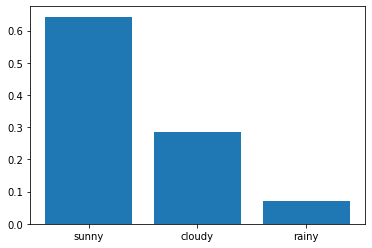

In [29]:
evals, evecs = np.linalg.eig(transition.T)
evec1 = evecs[:,np.isclose(evals, 1)]
evec1 = evec1[:,0]
p = evec1 / evec1.sum()
p = p.real
headers = ('sunny', 'cloudy', 'rainy')

print("Stationary distribution:")
print(tabulate(p[None,:], headers, tablefmt='orgtbl'))
plt.bar(headers, p)
plt.show()

### Exercise 2.e)

What is the entropy of the stationary distribution?

---

**Definition:** "The entropy is the expected information that the value of $x$ carries." (2)

$$
H(P,p) = -\sum_{i,j} p_i P_{i,j} \log_2 P_{i,j}
$$

**References:**
1. https://math.stackexchange.com/questions/1040972/entropy-of-a-markov-chain-right-result
2. Probabilistic Robotics

In [6]:
P = transition
i = np.arange(P.shape[0])
j = np.arange(P.shape[1])
bits = -np.log2(P[i,j])
entropy = np.sum(p[i] * P[i,j] * bits)
print("Bits required for x:\n", bits, '?')
print("The entropy is:\n", entropy)

Bits required for x:
 [0.32192809 1.32192809 2.32192809] ?
The entropy is:
 0.34981091814187576


### Exercise 2.e)

Using Bayes rule, compute the probability table of yesterday’s weather
given today’s weather. (It is okay to provide the probabilities numerically,
and it is also okay to rely on results from previous questions in
this exercise.)

---

**Bayes rule (2.16):**

$$
P(X_{t-1}=i|X_t=j) = \eta P(X_t=j | X_{t-1}=i) \times P(X_{t-1}=i) \\
= \frac{P(X_t=j | X_{t-1}=i) \times P(X_{t-1}=i)}{P(X_t=j)} \\
= \frac{P^T \times \psi_i}{\psi_j} = P_{t-1}
$$

In [34]:
Py = (P.T * p).T / p
print("Transition matrix to yesterday")
headers = ('   yesterday\ntoday', 'sunny', 'cloudy', 'rainy')
data = zip(('sunny', 'cloudy', 'rainy'), *Py)
table = tabulate(data, headers, tablefmt='orgtbl')
print(table)

Transition matrix to yesterday
|    yesterday   |   sunny |   cloudy |     rainy |
| today          |         |          |           |
|----------------+---------+----------+-----------|
| sunny          |    0.8  | 0.177778 | 0.0222222 |
| cloudy         |    0.45 | 0.4      | 0.15      |
| rainy          |    0    | 0.8      | 0.2       |


### Exercise 2.g)

Suppose we added seasons to our model. The state transition function
above would only apply to the Summer, whereas different ones would
apply toWinter, Spring, and Fall. Would this violate the Markov property
of this process? Explain your answer.

---

The markov property states the probability law of future state conditioned on the current
state does not depend on any other variables: The current state should be sufficient to compute
the future stochastic evolution. This implies the state transition function can not depend on the
season. Therefore, in order to restore the Markov property, we could incorporate the season into
the state variable.

## Exercise 3

Suppose that we cannot observe the weather directly, but instead rely on
a sensor. The problem is that our sensor is noisy. Its measurements are
governed by the following measurement model: